# Visualisation of PISM output <a class="tocSkip">
This is an example/teaser how to visualise PISM model output with the Python package `xarray`. If you have questions or need help, feel free to contact me.
    
_- Moritz Kreuzer (PIK, kreuzer@pik-potsdam.de), August 2021_
    
## What is xarray?
        
<img src="https://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" alt="Drawing" style="width: 200px;"/>
  
The documentation ([https://xarray.pydata.org](https://xarray.pydata.org)) describes it like:
> xarray (formerly xray) is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!
> 
> Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.
>
> Xarray is inspired by and borrows heavily from pandas, the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with netCDF files, which were the source of xarray’s data model, and integrates tightly with dask for parallel computing

## Prerequisites
To run this notebook your python environment needs the following packages:
 - numpy
 - xarray
 - cftime
    
A suitable environment can be installed on the cluster via:

    mamba create -n py_env_xarray numpy cftime=1.2.1 jupyter xarray
    source activate py_env_xarray

In [1]:
# importing packages
import numpy as np
import xarray as xr
import cftime

import matplotlib.pyplot as plt

# matplotlib standard parameters
plt.rcParams['figure.figsize'] = 12,8

In [14]:
# requirements for online data reference
import urllib.request
import io
import h5netcdf

/home/kreuzer/.conda/envs/extend_env2/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Import Data

Loading a netcdf file from web, needs some [workaround](https://towardsdatascience.com/an-efficient-way-to-read-data-from-the-web-directly-into-python-a526a0b4f4cb):

In [5]:
# specify data location (http)
url = 'https://raw.githubusercontent.com/m-kreuzer/pism_data_test/master/extra_16km.nc'

req = urllib.request.Request(url)

with urllib.request.urlopen(req) as resp:
    ds = xr.open_dataset(io.BytesIO(resp.read()), engine='h5netcdf')

/home/kreuzer/.conda/envs/extend_env2/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/kreuzer/.conda/envs/extend_env2/lib/python3.9/site-packages/h5netcdf/core.py:769: FutureWarning: String decoding changed with h5py >= 3.0. See https://docs.h5py.org/en/latest/strings.html for more details. Currently backwards compatibility with h5py < 3.0 is kept by decoding vlen strings per default. This will change in future versions for consistency with h5py >= 3.0. To silence this warning set kwarg ``decode_vlen_strings=False``. Setting ``decode_vlen_strings=True`` forces vlen string decoding.
  warnings.warn(msg, FutureWarning, stacklevel=0)


Otherwise, data can also be loaded from local disk directly:

In [6]:
#ds = xr.open_dataset('localpath/to/file.nc')

All metadata (like in `ncdump`) can be seen in interactive html view (expand/collapse data variables, attributes, ...) 

In [7]:
ds

<xarray.Dataset>
Dimensions:      (nv: 2, time: 10, x: 381, y: 381)
Coordinates:
  * time         (time) object 210101-01-01 00:00:00 ... 211001-01-01 00:00:00
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Dimensions without coordinates: nv
Data variables:
    mask         (time, y, x) int8 ...
    thk          (time, y, x) float64 ...
    velsurf_mag  (time, y, x) float64 ...
    time_bounds  (time, nv) timedelta64[ns] ...
Attributes:
    Conventions:  CF-1.6
    command:       /p/projects/pism/kreuzer/software/pism1.1.4_extra-double/b...
    proj4:        +lon_0=0.0 +ellps=WGS84 +datum=WGS84 +lat_ts=-71.0 +proj=st...
    source:       PISM (stable v1.1.4 committed by Constantine Khrulev on 201...
    NCO:          netCDF Operators version 4.7.8 (Homepage = http://nco.sf.ne...
    history:      Tue Aug 31 19:23:43 2021: ncrcat -F -d time,1,10 -v mask,th...

# Access data

## accessing a variable
Variables can be accessed via the python dictionary syntax

In [8]:
ds['thk']

<xarray.DataArray 'thk' (time: 10, y: 381, x: 381)>
[1451610 values with dtype=float64]
Coordinates:
  * time     (time) object 210101-01-01 00:00:00 ... 211001-01-01 00:00:00
  * x        (x) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
  * y        (y) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
Attributes:
    units:          m
    valid_min:      [0.]
    coordinates:    lat lon
    long_name:      land ice thickness
    pism_intent:    model_state
    standard_name:  land_ice_thickness

A subset of the data can be accessed with the `isel` (which stands for index select) method:

In [15]:
# take first or last time slice 
ds['thk'].isel(time=0)
#ds['thk'].isel(time=-1)

<xarray.DataArray 'thk' (y: 381, x: 381)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
    time     object 210101-01-01 00:00:00
  * x        (x) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
  * y        (y) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
Attributes:
    units:          m
    valid_min:      [0.]
    coordinates:    lat lon
    long_name:      land ice thickness
    pism_intent:    model_state
    standard_name:  land_ice_thickness

In [17]:
# calculating maximum ice thickness
ds['thk'].isel(time=0).max()

/home/kreuzer/.conda/envs/extend_env2/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.DataArray 'thk' ()>
array(4517.27368375)
Coordinates:
    time     object 210101-01-01 00:00:00

## select time slice according to date
Another method is not to select the data an basis of indices on the coordinate axes, but rather through discrete coordinate values. Here we select the data which is closest to the timestamp `1st Jan 210300`:

In [10]:
ds['thk'].sel(time=cftime.DatetimeNoLeap(210300,1,1), method='nearest')

<xarray.DataArray 'thk' (y: 381, x: 381)>
[145161 values with dtype=float64]
Coordinates:
    time     object 210301-01-01 00:00:00
  * x        (x) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
  * y        (y) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
Attributes:
    units:          m
    valid_min:      [0.]
    coordinates:    lat lon
    long_name:      land ice thickness
    pism_intent:    model_state
    standard_name:  land_ice_thickness

# Plotting data 

## velocity 2d plot
The plot method is a wrapper of the matplotlib library and automatically adds labels, colorbars, title, etc. based on the available metadata. All this can be adjusted of course manually.

In [11]:
#import cmocean as cmo

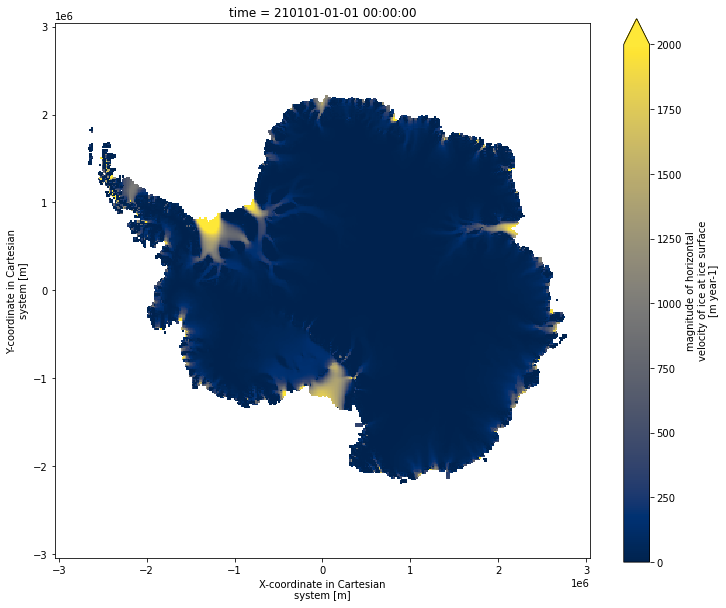

In [12]:
fig, axis = plt.subplots(1,1, figsize=(12,10))

ds['velsurf_mag'].isel(time=0).plot(
    ax=axis,
    vmax=2000,
    cmap='cividis')

axis.set_aspect('equal')

## plotting thickness evolution over time
xarray also comes with a handy built in method to create multiple plots of the same variable along a varying coordinate. Here we make ice thickness 2d plots for the first ten time slices (and set all zeros to NaNs before):

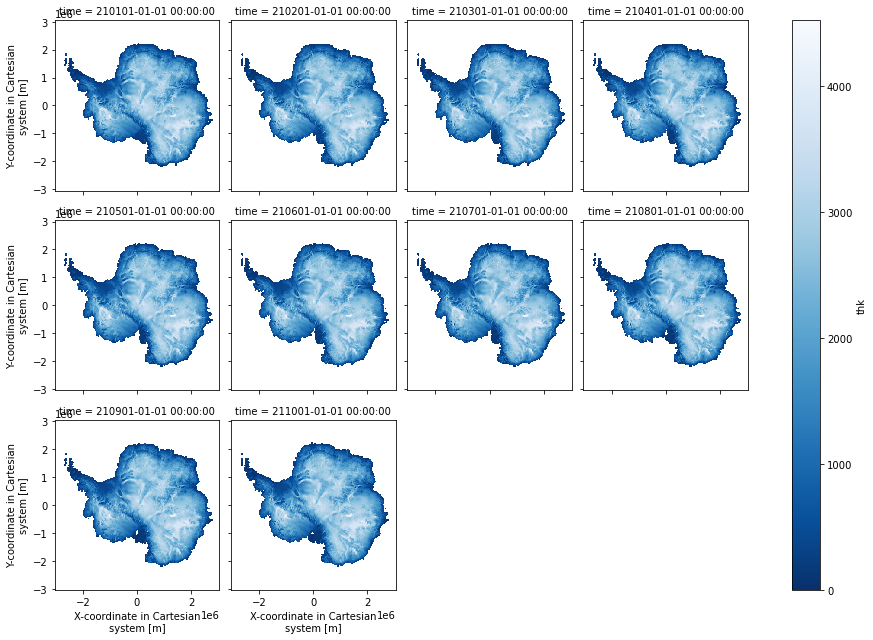

In [13]:
thickness = xr.where(ds['thk']==0, np.nan, ds['thk']) 
thickness.plot(col='time', 
               col_wrap=4,
               cmap="Blues_r")#cmo.cm.ice)